In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [1]:
pip install fosforml

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [3]:
table_name = 'DATAANALYSISFINAL24'

In [4]:
sf_df = my_session.sql("select DATE, DRUG_ID, TOTAL from {}".format(table_name))
df = sf_df.to_pandas()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     16784 non-null  object 
 1   DRUG_ID  16784 non-null  object 
 2   TOTAL    16784 non-null  float64
dtypes: float64(1), object(2)
memory usage: 393.5+ KB


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        DATE DRUG_ID   TOTAL
0 2014-01-02  Drug 1     0.0
1 2014-01-02  Drug 2   256.9
2 2014-01-02  Drug 3    68.0
3 2014-01-02  Drug 4   453.6
4 2014-01-02  Drug 5  8400.0


In [9]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
                      DATE         TOTAL
count                16784  16784.000000
mean   2016-11-15 12:00:00   1756.279280
min    2014-01-02 00:00:00      0.000000
25%    2015-06-10 00:00:00     40.000000
50%    2016-11-15 12:00:00    150.000000
75%    2018-04-24 00:00:00    722.400000
max    2019-09-30 00:00:00  66000.000000
std                    NaN   4210.381013


In [10]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     16784 non-null  datetime64[ns]
 1   DRUG_ID  16784 non-null  object        
 2   TOTAL    16784 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 393.5+ KB
None


In [11]:
# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
DATE       0
DRUG_ID    0
TOTAL      0
dtype: int64


In [12]:
# Display the column names in the dataset
print("\nColumn names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['DATE', 'DRUG_ID', 'TOTAL'], dtype='object')


In [13]:
# Display the correlation matrix of the dataset
print("\nCorrelation matrix of the dataset:")
correlation_matrix = df[["DATE","DRUG_ID","TOTAL"]].corr()
print(correlation_matrix)


Correlation matrix of the dataset:


ValueError: could not convert string to float: 'Drug 1'

In [14]:
# Display the correlation matrix of the dataset
print("\nCorrelation matrix of the dataset:")
correlation_matrix = df[["DATE", "TOTAL"]].corr()
print(correlation_matrix)


Correlation matrix of the dataset:
           DATE     TOTAL
DATE   1.000000 -0.024242
TOTAL -0.024242  1.000000


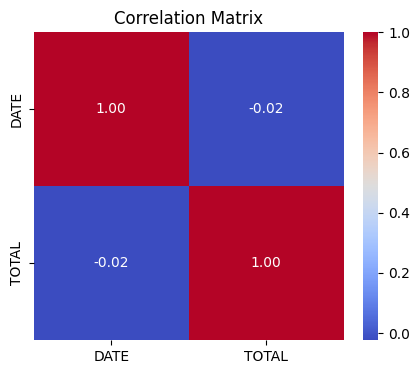

In [15]:
# Plotting correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Plotting distributions of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns

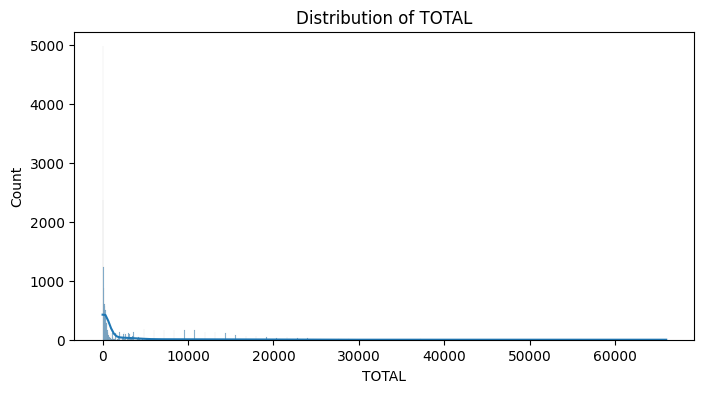

In [17]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

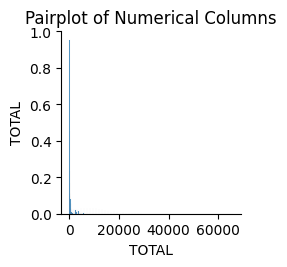

In [18]:
# Plotting pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numerical Columns')
plt.show()

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [21]:
df.head()

,DATE,DRUG_ID,TOTAL
0,2014-01-02,Drug 1,0.0
1,2014-01-02,Drug 2,256.9
2,2014-01-02,Drug 3,68.0
3,2014-01-02,Drug 4,453.6
4,2014-01-02,Drug 5,8400.0


In [23]:
# Group by plant and calculate the average ROCE for each plant
DrugSales = df.groupby(['DATE','DRUG_ID'])['TOTAL'].sum().reset_index()

In [24]:
DrugSales.head()

,DATE,DRUG_ID,TOTAL
0,2014-01-02,Drug 1,0.0
1,2014-01-02,Drug 2,256.9
2,2014-01-02,Drug 3,68.0
3,2014-01-02,Drug 4,453.6
4,2014-01-02,Drug 5,8400.0


In [25]:
# Prepare the data for regression model
DrugSales['DATE'] = pd.to_datetime(DrugSales['DATE'])
DrugSales['Month'] = DrugSales['DATE'].dt.month + (DrugSales['DATE'].dt.year - DrugSales['DATE'].dt.year.min()) * 12

In [26]:
DrugSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14156 entries, 0 to 14155
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     14156 non-null  datetime64[ns]
 1   DRUG_ID  14156 non-null  object        
 2   TOTAL    14156 non-null  float64       
 3   Month    14156 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 387.2+ KB


In [27]:
# Prepare the data for regression model
X = np.arange(len(DrugSales)).reshape(-1, 1)  # Time periods (months)
y = DrugSales['TOTAL'].values  # ROCE values

In [28]:
# Initialize lists to store results
results = []

In [29]:
DrugSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14156 entries, 0 to 14155
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     14156 non-null  datetime64[ns]
 1   DRUG_ID  14156 non-null  object        
 2   TOTAL    14156 non-null  float64       
 3   Month    14156 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 387.2+ KB


DRUG_ID: Drug 1
R2 Score: 0.0011529696554500868
MAPE: 1.2502351140423475e+18
MSE: 25291299.51277401


NameError: name 'plant' is not defined

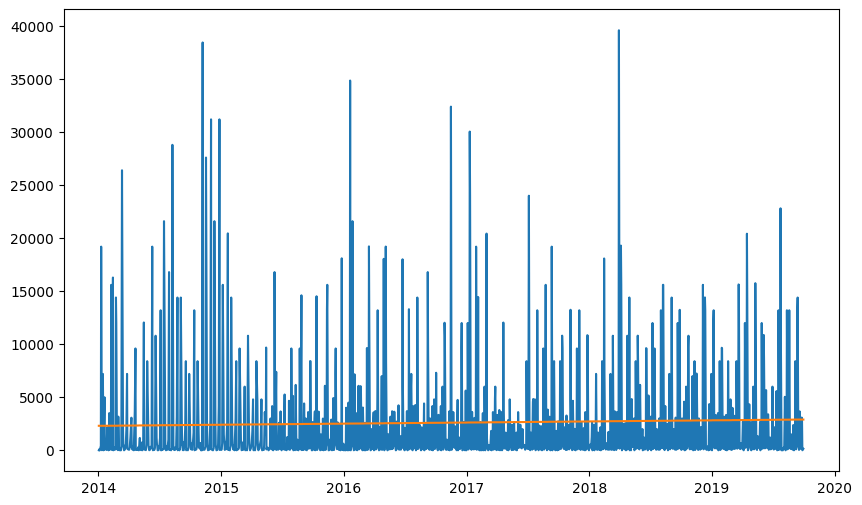

In [31]:
# Loop through each plant and fit a regression model
for Drug in DrugSales['DRUG_ID'].unique():
    Drug_data = DrugSales[DrugSales['DRUG_ID'] == Drug]
    X = Drug_data['Month'].values.reshape(-1, 1)
    y = Drug_data['TOTAL'].values
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Forecast the ROCE for the next 6 months
    forecast_months = 3
    future_months = np.arange(X[-1][0] + 1, X[-1][0] + 1 + forecast_months).reshape(-1, 1)
    forecasted_revenue = model.predict(future_months)
    
    # Store the results
    for i in range(forecast_months):
        results.append({
            'Date': (Drug_data['DATE'].max() + pd.DateOffset(months=i+1)).strftime('%Y-%m-%d'),
            'DRUG_ID': Drug,
            'Predicted_Revenue': forecasted_revenue[i]
        })
    
    # Calculate model parameters
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f"DRUG_ID: {Drug}")
    print(f"R2 Score: {r2}")
    print(f"MAPE: {mape}")
    print(f"MSE: {mse}")
    
    # Plot the test results
    plt.figure(figsize=(10, 6))
    plt.plot(Drug_data['DATE'], y, label='Actual Revenue')
    plt.plot(Drug_data['DATE'], y_pred, label='Predicted Revenue')
    plt.title(f'Revenue Prediction for DRUG_ID {plant}')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()